# State Reducers

## Default Overwritting State

By default a states value is overwritten at each step

In the following code we define foo with a value of 1, our node will just add 1. 

In [2]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END

class State(TypedDict):
    foo: int
    
def node1(state):
    print('--node1--')
    return {'foo':state['foo']+1}

builder = StateGraph(State)
builder.add_node('node1',node1)

builder.add_edge(START,'node1')
builder.add_edge('node1',END)

graph = builder.compile()

graph.invoke({'foo':1})

--node1--


{'foo': 2}

## Branching Paths

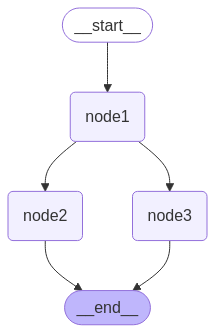

In [4]:
class State(TypedDict):
    foo: int
    
def node1(state):
    print('--node1--')
    return {'foo':state['foo']+1}

def node2(state):
    print('--node2--')
    return {'foo':state['foo']+1}
def node3(state):
    print('--node3--')
    return {'foo':state['foo']+1}

builder = StateGraph(State)
builder.add_node('node1',node1)
builder.add_node('node2',node2)
builder.add_node('node3',node3)

builder.add_edge(START,'node1')
builder.add_edge('node1','node2')
builder.add_edge('node1','node3')
builder.add_edge('node2',END)
builder.add_edge('node3',END)
graph = builder.compile()
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [6]:
from langgraph.errors import InvalidUpdateError
try:
    graph.invoke({'foo':1})
except InvalidUpdateError as e:
    print(f'invalide error {e}')

--node1--
--node2--
--node3--
invalide error At key 'foo': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


Essentially both nodes are working in parallel, thus it is unsure on how to update the state 